# 10/11/22

Unsupervised learning is a type of machine learning that looks for previously unknown patterns in a dataset. It is used when you do not know what to look for, but you know that there is something interesting to find. Unsupervised learning is used to find clusters of similar data points, to find outliers, and to find hidden patterns in data.

1. clustering
2. dimensionality reduction

1. Hierarchical clustering
2. K-means clustering
3. DBSCAN

## K-means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df=pd.read_csv('./Mall_Customers (1).csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
X=df.iloc[:,-2:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


WCSS (within-cluster sum of squares) is the sum of the squared distances between each member of the cluster and its centroid. The idea is to choose a number of clusters that minimizes WCSS. The elbow method is a heuristic that consists of plotting the WCSS as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

wcss= (d1+d2+...+dn)/n

where d is the mean distance between the data point and the centroid of the cluster

more clusters -> smaller WCSS

Text(0, 0.5, 'Wcss')

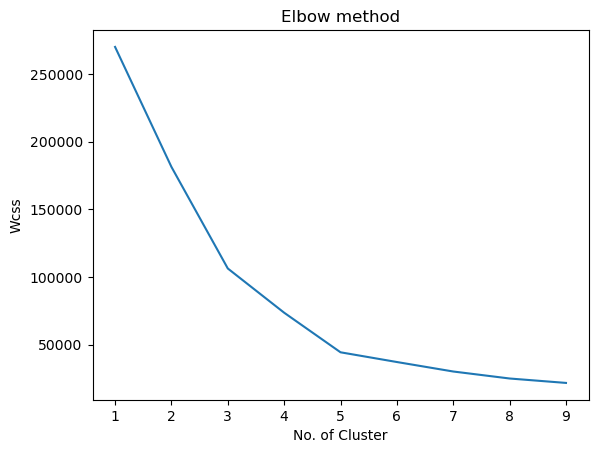

In [3]:
# wcss
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('No. of Cluster')
plt.ylabel('Wcss')


best number of clusters were line is bending (elbow method)

In [4]:
# k-means
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:

kmeans=KMeans(5,random_state=0)
y_pred=kmeans.fit_predict(X)
y_pred


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

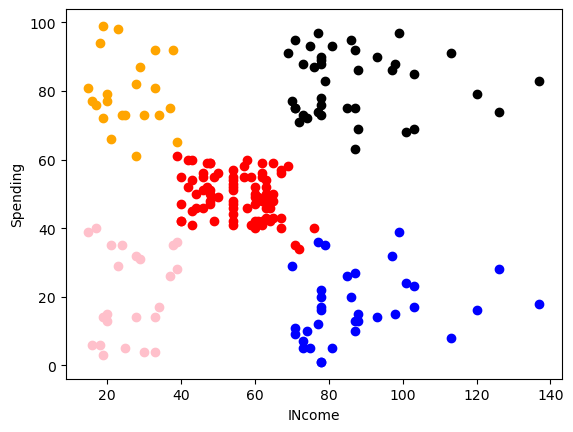

In [6]:
color=['blue','red','black','orange','pink']
for i in range(5):
    ind = y_pred == i
    plt.scatter(X.iloc[ind,0],X.iloc[ind,1],color=color[i])

plt.xlabel('INcome')
plt.ylabel('Spending')

plt.show()


# 11/11/22

## **Hierarchical clustering**
1. agglomerative
2. divisive

dendrogram: use to find the optimal number of clusters

ward method: minimizes the variance of the clusters being merged


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv('./Mall_Customers (1).csv')
X=df.iloc[:,-2:]

Text(0.5, 1.0, 'Dendrogram')

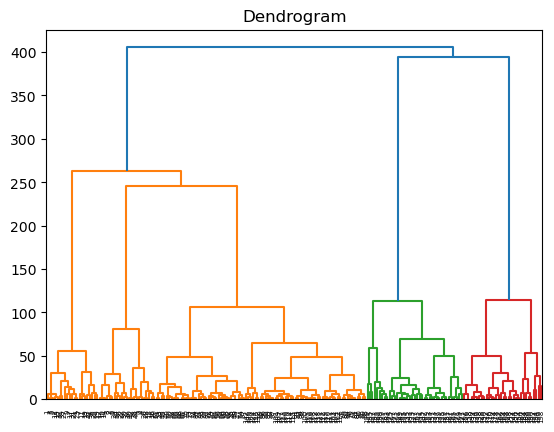

In [8]:
from scipy.cluster import hierarchy as sch
sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')


After making dendrogram, we can cut it through the center of the longest bar to get the optimal number of clusters. The number of cluster below the cut is the optimal number of clusters.

In [9]:
from sklearn.cluster import AgglomerativeClustering

agg=AgglomerativeClustering(5)
y_pred=agg.fit_predict(X)

cont.. on basic_cars.ipynb